In [8]:
#from tqdm import tqdm_notebook as tqdm
import numpy as np
import scipy.linalg as lin

import matplotlib.pyplot as plt
plt.style.use(['dark_background'])

from pyhmc import hmc

# HMC Reference 

We do a 'gold standard' HMC Simulation to have a posterior distribution to compare against.

In [9]:
R = 1.0
N = 10**2

dx = R/N

mesh = np.linspace(0, R, N, endpoint=False)[1:]
BBcov = np.zeros((len(mesh), len(mesh)))

for i in range(len(mesh)):
    for j in range(len(mesh)):
        BBcov[i, j] = np.minimum(mesh[i]/R, mesh[j]/R) - mesh[i]*mesh[j]/(R*R)
   
#inverse covariance
Cinv = lin.inv(BBcov)

In [10]:
# return log probability and gradient log probability
def logprob_and_gradient(x):
    z = Cinv @ x
    v  = (x*x-1.0)
    logp = -0.5 * x @  z - 0.5*dx*np.dot(v,v)
    grad = - z - 2.0*dx*(x**3 - x)
    return logp, grad

# run the sampler
samples, diagn  = hmc(logprob_and_gradient, x0=np.zeros(Cinv.shape[0]), n_samples=int(1e6), return_diagnostics=True, persistence=True, epsilon=0.025)

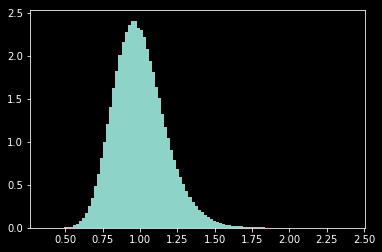

In [14]:
#plot histogram of local acceptance rates to ensure chain is behaving reasonably
plt.hist(diagn['acc'], bins=100, density=True);

Text(0.5, 1.0, 'Covariance')

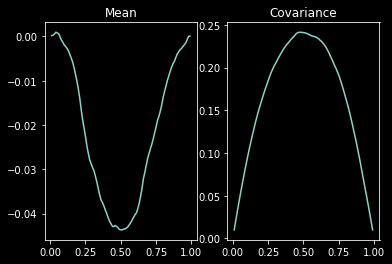

In [18]:
#Plot the mean at each point of the mesh
plt.subplot(121)
plt.plot(mesh, np.mean(samples,0))
plt.title("Mean")

#Plot the variance at each point of the mesh
plt.subplot(122)
plt.plot(mesh, np.diag(np.cov(samples.T)))
plt.title("Covariance")


Text(0.5, 1.0, 'Control Variate (should be zero)')

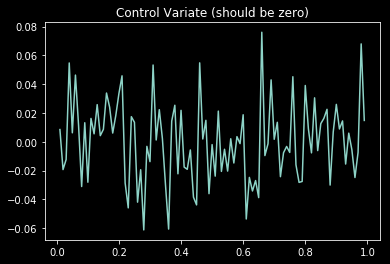

In [23]:
#Control variate test
plt.plot(mesh, np.mean((Cinv@samples.T + 2.0*dx*((samples.T)**3 - samples.T)).T,0))
plt.title("Control Variate (should be zero)")

In [ ]:
#Save all the data here.